In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [83]:
df=pd.read_csv("instagram_reach.csv")
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [84]:
df.drop(['Unnamed: 0','S.No'],axis=1,inplace=True)
df

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [85]:
df.rename(columns={'USERNAME':'Username',"Time since posted":"Hours Since Posted"},inplace=True)
df

,Username,Caption,Followers,Hashtags,Hours Since Posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [86]:
df['Hours Since Posted']=df["Hours Since Posted"].str.replace('hours','')
df['Hours Since Posted']=df["Hours Since Posted"].astype(int)
df

,Username,Caption,Followers,Hashtags,Hours Since Posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Username            100 non-null    object
 1   Caption             94 non-null     object
 2   Followers           100 non-null    int64 
 3   Hashtags            100 non-null    object
 4   Hours Since Posted  100 non-null    int32 
 5   Likes               100 non-null    int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 4.4+ KB


In [88]:
df.isnull().sum()

Username              0
Caption               6
Followers             0
Hashtags              0
Hours Since Posted    0
Likes                 0
dtype: int64

In [89]:
df.size

600

In [90]:
df.dropna(axis=0,inplace=True)
df.size

564

In [91]:
df.describe(include='all')

,Username,Caption,Followers,Hashtags,Hours Since Posted,Likes
count,94,94,94.000000,94,94.000000,94.000000
unique,90,94,NaN,92,NaN,NaN
top,mikequindazzi,Who are #DataScientist and what do they do? >>...,NaN,#DeepLearning #MachineLearning#ArtificialIntel...,NaN,NaN
freq,4,1,NaN,2,NaN,NaN
mean,NaN,NaN,942.627660,NaN,3.521277,47.882979
std,NaN,NaN,1023.894946,NaN,3.488009,56.501757
min,NaN,NaN,11.000000,NaN,2.000000,8.000000
25%,NaN,NaN,231.000000,NaN,2.000000,19.000000
50%,NaN,NaN,593.500000,NaN,2.000000,29.500000
75%,NaN,NaN,1177.000000,NaN,3.000000,46.000000


In [92]:
df1=df[['Followers','Hours Since Posted','Likes']]
df1

,Followers,Hours Since Posted,Likes
0,1600,11,139
1,880,2,23
2,255,2,25
3,340,3,49
4,304,3,30
...,...,...,...
95,614,3,31
96,450,3,42
97,182,3,10
98,2039,3,222


<Axes: >

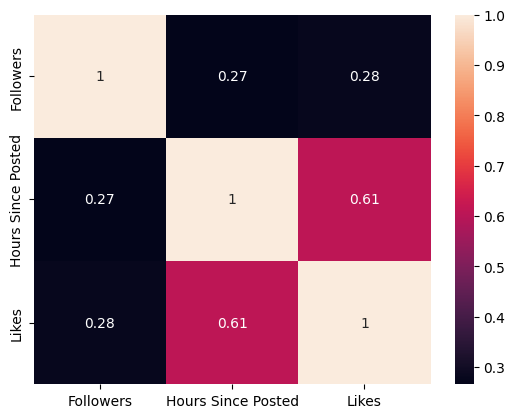

In [93]:
sns.heatmap(df1.corr(),annot=True)

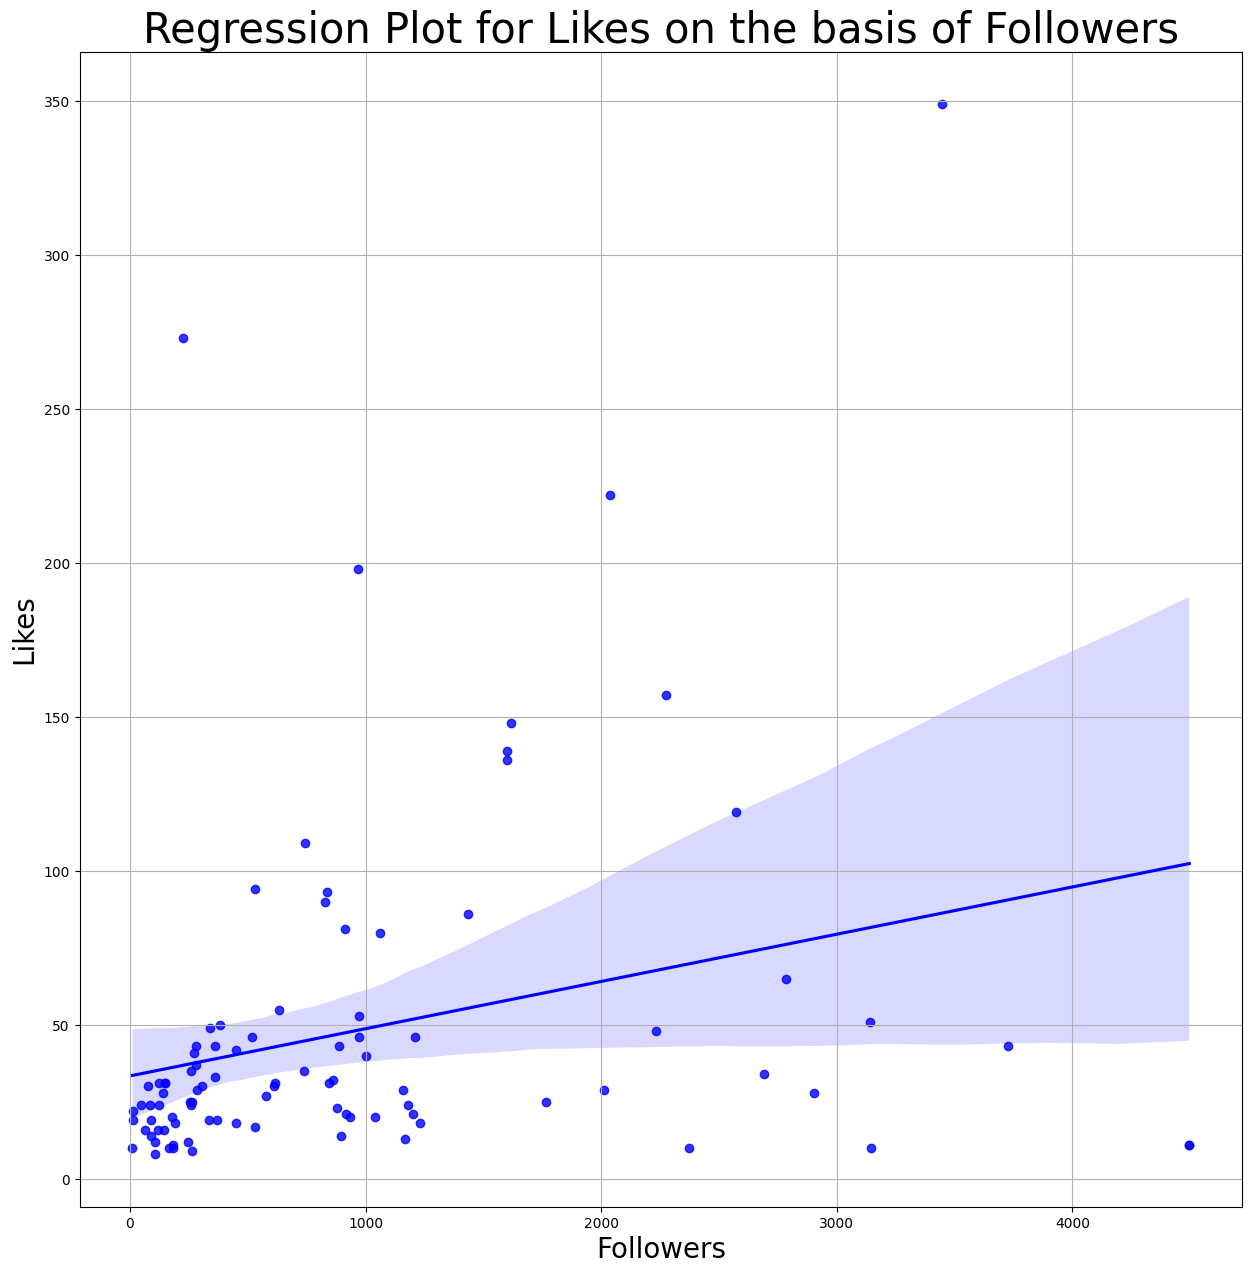

In [94]:
plt.figure(figsize=(15,15))
sns.regplot(x='Followers', y='Likes', data=df1, color='blue')
plt.xlabel('Followers', size=20)
plt.ylabel('Likes', size=20)
plt.title('Regression Plot for Likes on the basis of Followers', size=30)
plt.grid()
plt.show()

[]

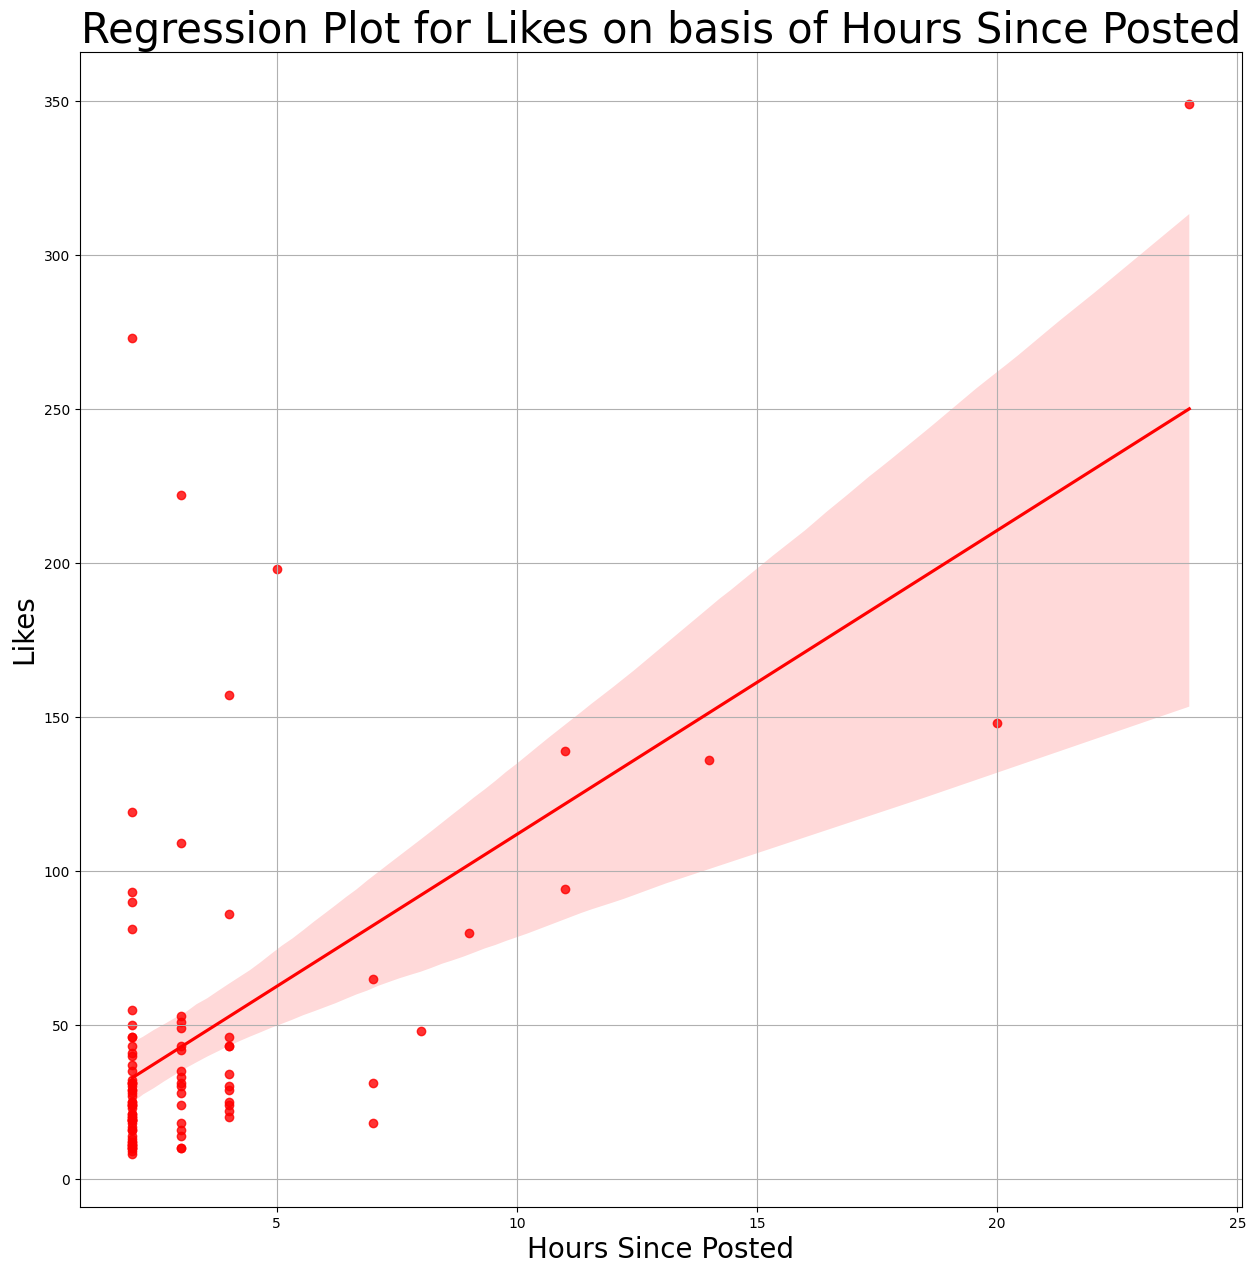

In [95]:
plt.figure(figsize=(15,15))
sns.regplot(x='Hours Since Posted',y='Likes',data=df1,color='red')
plt.xlabel('Hours Since Posted',size=20)
plt.ylabel('Likes',size=20)
plt.title("Regression Plot for Likes on basis of Hours Since Posted",size=30)
plt.grid()
plt.plot()

In [96]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [97]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
stopwords.add("new")
stopwords.add("will")
def wordcloud1(column):
    words=''
    for word in df[column]:
        words=words+str(word)
    wc=WordCloud(height=900,width=900,stopwords=stopwords,min_font_size=30).generate(words)
    plt.figure(figsize=(15,15),facecolor='white')
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.title("WordCloud of"+str(column),size=30)
    plt.show()



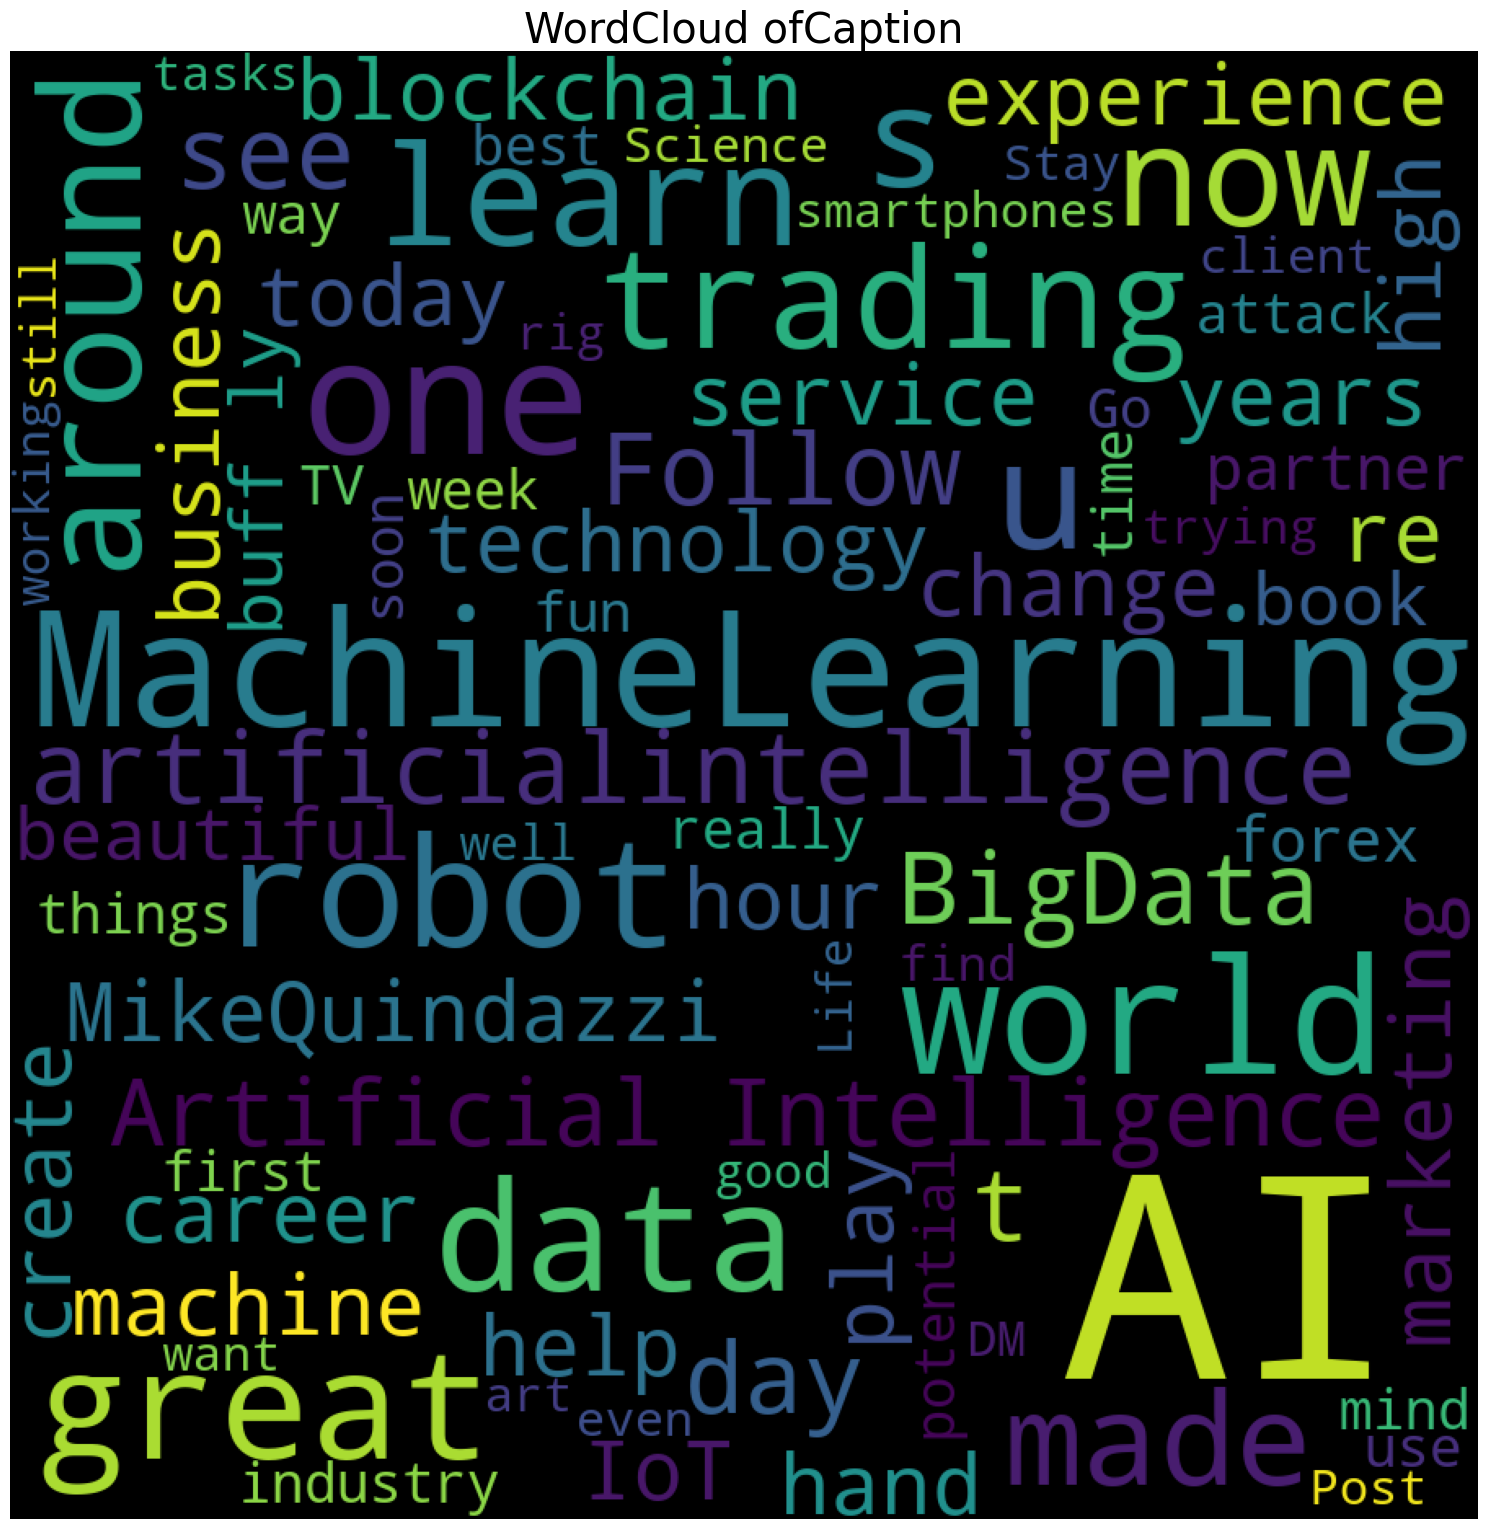

In [98]:
wordcloud1('Caption')

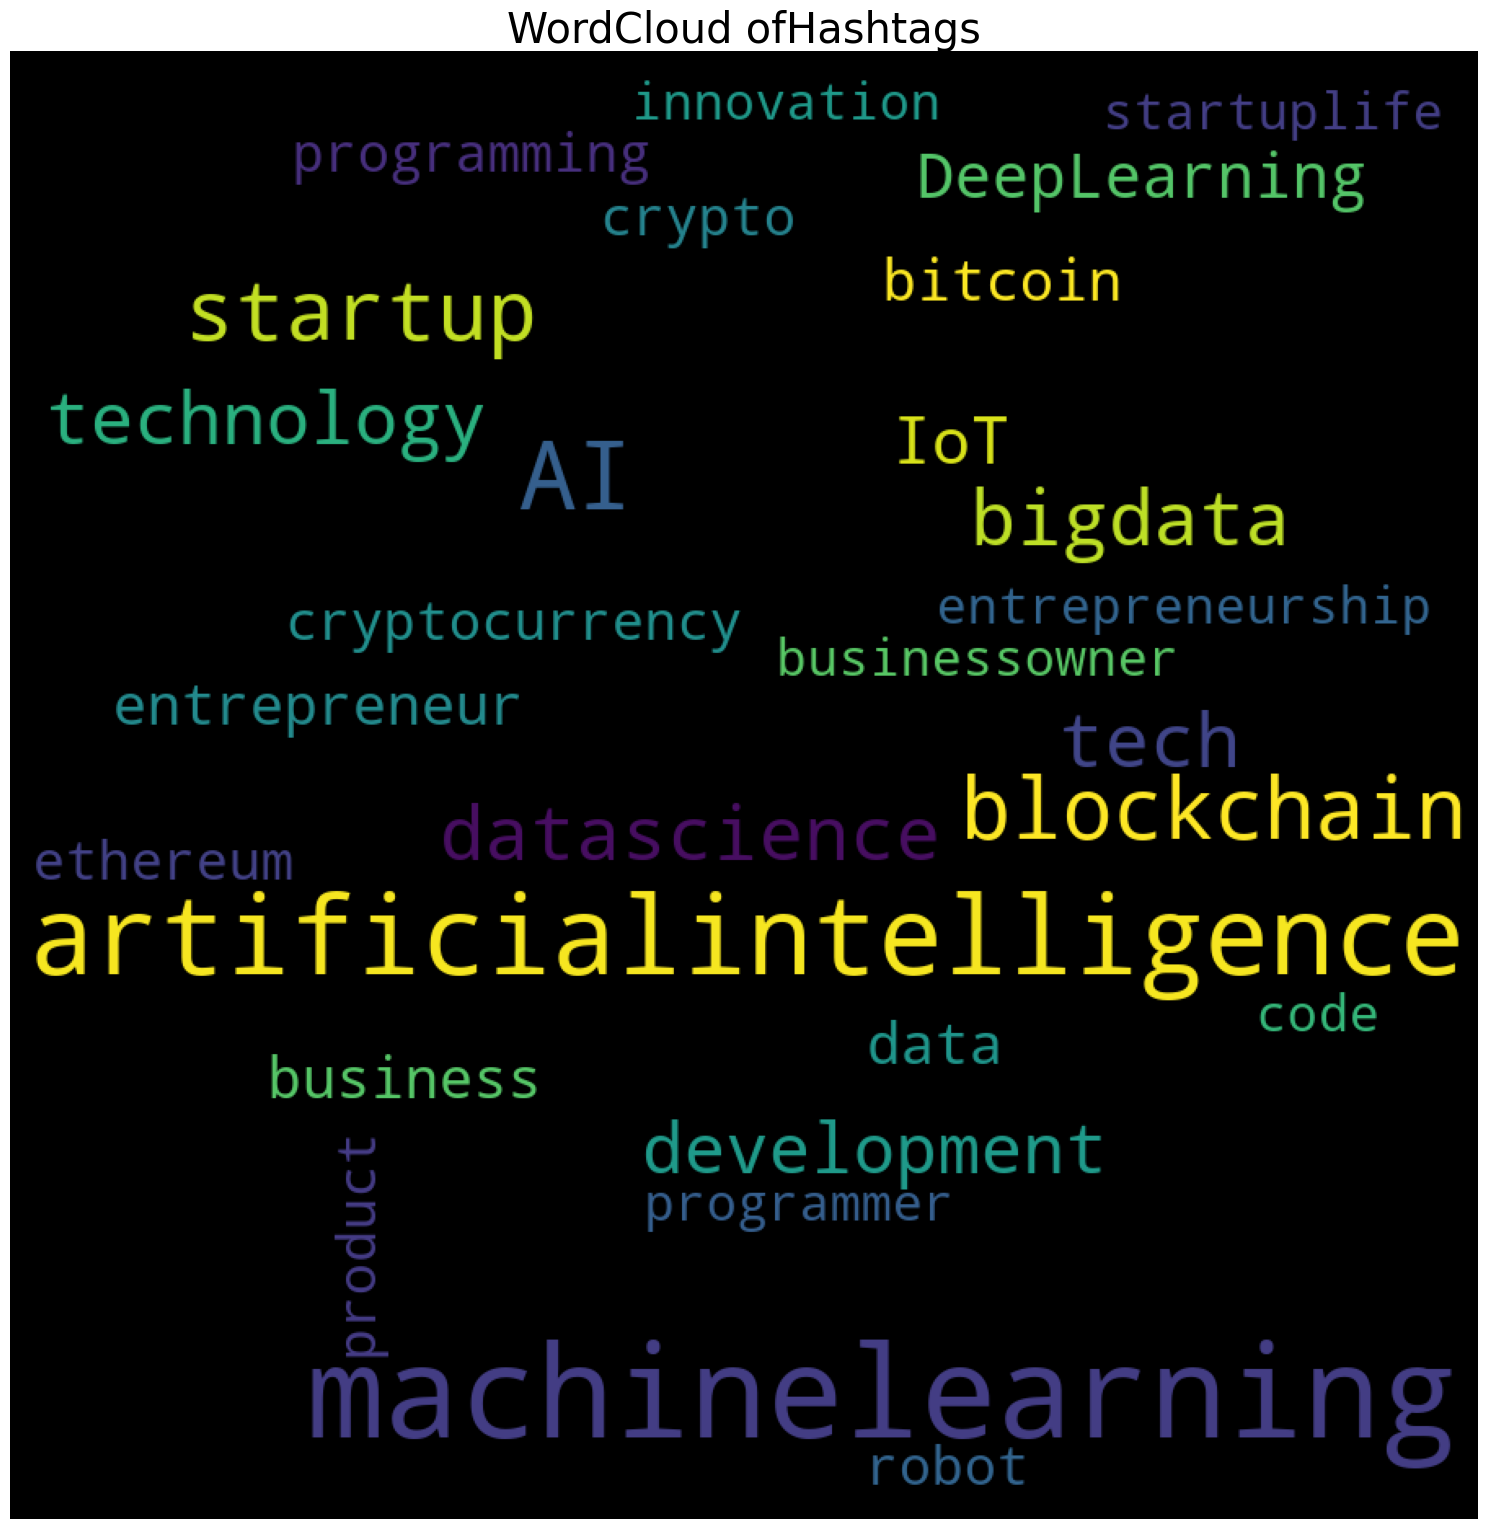

In [99]:
wordcloud1('Hashtags')

In [125]:
# df3=df[['Followers','Hours Since Posted']]
# df3
df2=df.drop(columns=['Username'],axis=1)
df2=pd.get_dummies(df2)
df2

,Followers,Hours Since Posted,Likes,"Caption_""If you can imagine it, you can create it & if you dream it, you can become it "" ~ 🍀🖤. Try out nodemon for running #pythonscripts automatically on changes instead of manually restarting everytime ... rock solid 🤖☕👌","Caption_""It is this perfect accuracy, this lack of play, of variety, that makes the machine-made article so lifeless.""",Caption_#Repost @wesabio Sometimes the truth hurts |,Caption_#WorldCup is here and BlocSide is bringing back our favorite game just for football #fans around the world! #linkinbio . Play new rounds EVERYDAY and win #mvp#tokens!,Caption_1 in 3 #Smartphones will ship w/ #MachineLearning and #ArtificialIntelligence at the chipset level by 2020 >> @MikeQuindazzi >> #IoT #AI 2018 Report >> https://buff.ly/2HV0VAQ,Caption_256/365 - Ski Goggles,"Caption_328 S. Wetherly Drive, Beverly Hills, CA 90212. This beautiful new construction our team completed in early May 2018 was sold before the framing was even started!! I am kidding, but it sure felt that way!",...,Hashtags_#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,Hashtags_#workspace #work #developer#development #developerlife #apple #imac#macbook #macbookpro #blackandwhite#coder #code #coding #html #css #php#wordpress #javascript #dvlp_search #linux#ubuntu #webdeveloper #webdev#webdevelopment #dev #coder #coding#code,Hashtags_#worldcode #coding#python #codeaholics #rstudio #codinglife#worldofprogrammers #datascience#machinelearning #dataviz #data #statistics#macbookpro #peoplewhocode#codeismylife #datavisualization#artificialintelligence #digitalnomads#digitalnomad #travel,Hashtags_#youtube #applemusic #itunes#soundcloud #spinrilla #spotify #bigdata#blockchain #dontbandwagonlater,Hashtags_#любовь #gm #sme #smenigeria #profits#businessowners #businessplan#entrepreneurship #entrepreneur#blockchain #crypto #cointelegraph#bitcoinprice #mining #cryptocurrencies#bch #bitcoins #litecoin #investment#investor #stockmarket #stocks #getrich#makemoney #makemoneyonline#mentorship #mentoring #xrp #bitfinex#altcoins,Hashtags_.#Tech #virtualreality #IoT #Machinelearning,Hashtags_[#Infographic] #Wearable #Sensors #MachineLearning#IoT #BigData #DigitalTransformation#futureofwork #marketing #analytics#bigdata #Cloud #Blogging#ContentMarketing #DigitalMarketing ht: #BigData #MachineLearning #AI #IoT#infograp,Hashtags_thebeautymindset#businessman#quoteoftheday #businessowner#businesswoman #success #grind#motivation #motivational #lifestyle#happiness #entrepreneurs#entrepreneurlife #business #working #founder#startup #money #magazine #moneymaker#startuplife #successful #passion #inspiredaily#hardwork #hardworkpaysoff #desire,Hashtags_ #datascience #data #tech #technology#future #machinelearning #ai#visualizations #dataisbeautiful,Hashtags_ #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing
0,1600,11,139,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,880,2,23,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,255,2,25,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,340,3,49,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,304,3,30,False,False,False,False,False,False,False,...,False,False,False,False,False,False

In [126]:
target=df['Likes']
features=df2
features

,Followers,Hours Since Posted,Likes,"Caption_""If you can imagine it, you can create it & if you dream it, you can become it "" ~ 🍀🖤. Try out nodemon for running #pythonscripts automatically on changes instead of manually restarting everytime ... rock solid 🤖☕👌","Caption_""It is this perfect accuracy, this lack of play, of variety, that makes the machine-made article so lifeless.""",Caption_#Repost @wesabio Sometimes the truth hurts |,Caption_#WorldCup is here and BlocSide is bringing back our favorite game just for football #fans around the world! #linkinbio . Play new rounds EVERYDAY and win #mvp#tokens!,Caption_1 in 3 #Smartphones will ship w/ #MachineLearning and #ArtificialIntelligence at the chipset level by 2020 >> @MikeQuindazzi >> #IoT #AI 2018 Report >> https://buff.ly/2HV0VAQ,Caption_256/365 - Ski Goggles,"Caption_328 S. Wetherly Drive, Beverly Hills, CA 90212. This beautiful new construction our team completed in early May 2018 was sold before the framing was even started!! I am kidding, but it sure felt that way!",...,Hashtags_#whoiswho #aitrading #ai #aitradingteam#instateam #instapeople #ai #trading#artificialintelligence #crypto#cryptocurrency #blockchain #tradingforex#forex #fiatmoney #coins #machinelearning#userexperience #instamachinelearning#instabigdata #instamarketing#artificialintelligence #deeplearning#datascience #industry #marketing#bigdata #datascience #machinelearning#ml,Hashtags_#workspace #work #developer#development #developerlife #apple #imac#macbook #macbookpro #blackandwhite#coder #code #coding #html #css #php#wordpress #javascript #dvlp_search #linux#ubuntu #webdeveloper #webdev#webdevelopment #dev #coder #coding#code,Hashtags_#worldcode #coding#python #codeaholics #rstudio #codinglife#worldofprogrammers #datascience#machinelearning #dataviz #data #statistics#macbookpro #peoplewhocode#codeismylife #datavisualization#artificialintelligence #digitalnomads#digitalnomad #travel,Hashtags_#youtube #applemusic #itunes#soundcloud #spinrilla #spotify #bigdata#blockchain #dontbandwagonlater,Hashtags_#любовь #gm #sme #smenigeria #profits#businessowners #businessplan#entrepreneurship #entrepreneur#blockchain #crypto #cointelegraph#bitcoinprice #mining #cryptocurrencies#bch #bitcoins #litecoin #investment#investor #stockmarket #stocks #getrich#makemoney #makemoneyonline#mentorship #mentoring #xrp #bitfinex#altcoins,Hashtags_.#Tech #virtualreality #IoT #Machinelearning,Hashtags_[#Infographic] #Wearable #Sensors #MachineLearning#IoT #BigData #DigitalTransformation#futureofwork #marketing #analytics#bigdata #Cloud #Blogging#ContentMarketing #DigitalMarketing ht: #BigData #MachineLearning #AI #IoT#infograp,Hashtags_thebeautymindset#businessman#quoteoftheday #businessowner#businesswoman #success #grind#motivation #motivational #lifestyle#happiness #entrepreneurs#entrepreneurlife #business #working #founder#startup #money #magazine #moneymaker#startuplife #successful #passion #inspiredaily#hardwork #hardworkpaysoff #desire,Hashtags_ #datascience #data #tech #technology#future #machinelearning #ai#visualizations #dataisbeautiful,Hashtags_ #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing
0,1600,11,139,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,880,2,23,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,255,2,25,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,340,3,49,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,304,3,30,False,False,False,False,False,False,False,...,False,False,False,False,False,False

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [128]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler()
x_train=x.fit_transform(x_train)
x_test=x.transform(x_test)

USING GRADIENT BOOSTER REGRESSOR

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [130]:
y_pred=gbr.predict(x_test)
y_pred

array([ 23.99846827,  20.04162404,  17.99273548, 108.98864292,
       147.98895548,  24.95735635, 147.98895548,  41.01566762,
        31.00984781,  15.97308344,  29.47301807,  14.01771567,
        42.99949227,  15.97308344,  80.99402642,  29.47301807,
        29.47301807,  42.99949227,  20.04162404,  31.00984781,
        50.96586059,  20.48514183,  31.00984781,  92.99471972,
        29.47301807,  48.99764181,  18.95619841,  50.96586059,
        18.95619841])

In [131]:
metrics.r2_score(y_test, y_pred)

0.9900933451720352

USING LINEAR REGRESSION

In [132]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([39.74023137, 38.8389327 , 37.55284308, 72.7629927 , 90.16032223,
       39.67315687, 90.56347253, 46.89180317, 48.27175736, 35.72414971,
       42.1403431 , 33.44759176, 45.46817937, 38.21172174, 67.59884377,
       43.01586024, 44.14442593, 40.10445045, 41.14519492, 42.25198052,
       51.43968152, 37.60700812, 42.40482367, 62.10554019, 40.63534957,
       56.3588514 , 38.920836  , 49.11509293, 35.49379247])

In [133]:
metrics.r2_score(y_test,y_pred)

0.6335923171068084